Date: 2016-09-22

The purpose of this notebooks is to simulate data in order to make sure the spectral module works like expected.

## Setup

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole
import os
import sys
import collections
import random
import scipy.signal
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.axes_grid
import seaborn as sns
import pandas as pd
import tqdm
import IPython.display

sys.path.append('../src/')
import spectral

ImportError: No module named 'data_filter'

## Spectrum

### Test 200 Hz signal

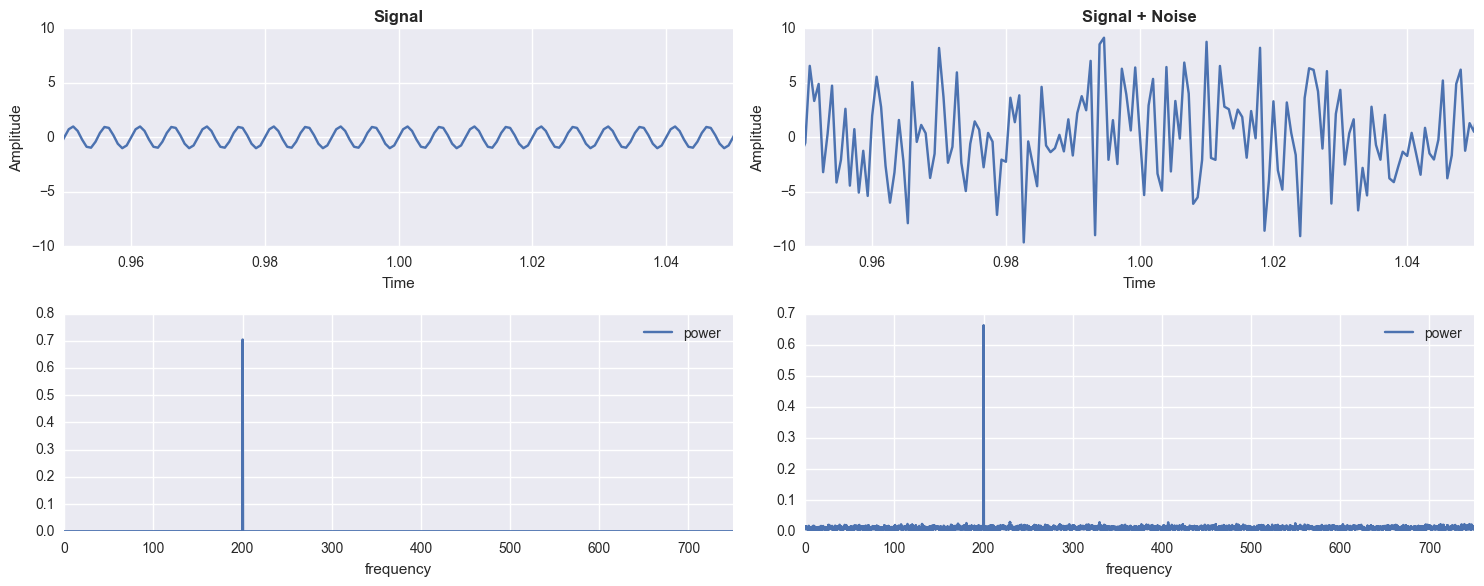

In [4]:
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 50)
num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points, endpoint=True)
signal = np.sin(2 * np.pi * time * frequency_of_interest)
noise = np.random.normal(0, 4, len(signal))

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.plot(time, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal', fontweight='bold')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

plt.subplot(2, 2, 2)
plt.plot(time, signal + noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal + Noise', fontweight='bold')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

ax = plt.subplot(2, 2, 3)
psd = spectral.multitaper_power_spectral_density(signal,
                                                 sampling_frequency=sampling_frequency,
                                                 number_of_tapers=10,
                                                 time_halfbandwidth_product=20).plot(ax=ax)

ax = plt.subplot(2, 2, 4)
psd = spectral.multitaper_power_spectral_density(signal + noise,
                                                 sampling_frequency=sampling_frequency,
                                                 number_of_tapers=10,
                                                 time_halfbandwidth_product=20).plot(ax=ax)
plt.tight_layout()

### Test 30 Hz signal

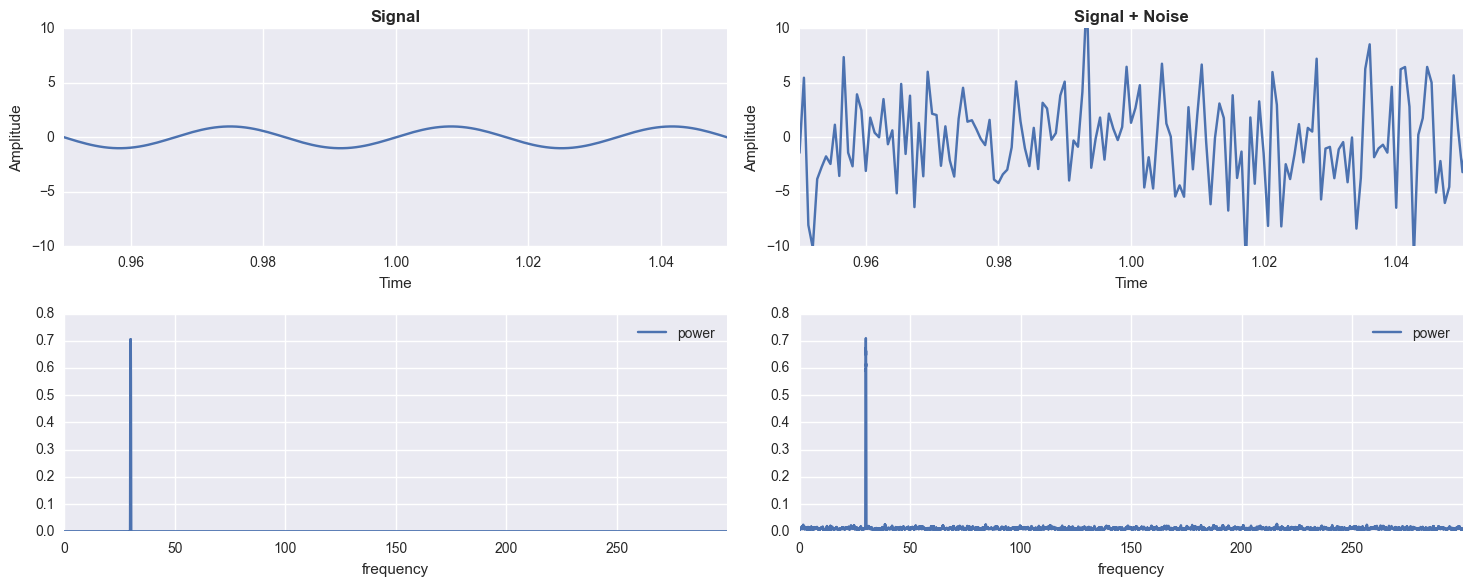

In [5]:
frequency_of_interest = 30
sampling_frequency = 1500
time_extent = (0, 50)
num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points, endpoint=True)
signal = np.sin(2 * np.pi * time * frequency_of_interest)
noise = np.random.normal(0, 4, len(signal))

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.plot(time, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal', fontweight='bold')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

plt.subplot(2, 2, 2)
plt.plot(time, signal + noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal + Noise', fontweight='bold')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

ax = plt.subplot(2, 2, 3)
psd = spectral.multitaper_power_spectral_density(signal, sampling_frequency,
                                                 number_of_tapers=10,
                                                 time_halfbandwidth_product=20,
                                                 desired_frequencies=[0, 300]).plot(ax=ax)

ax = plt.subplot(2, 2, 4)
psd = spectral.multitaper_power_spectral_density(signal + noise, sampling_frequency,
                                                 number_of_tapers=10,
                                                 time_halfbandwidth_product=20,
                                                 desired_frequencies=[0, 300]).plot(ax=ax)
plt.tight_layout()

## Spectrogram

### No trials, 200 Hz signal with 50 Hz signal starting at 25 seconds

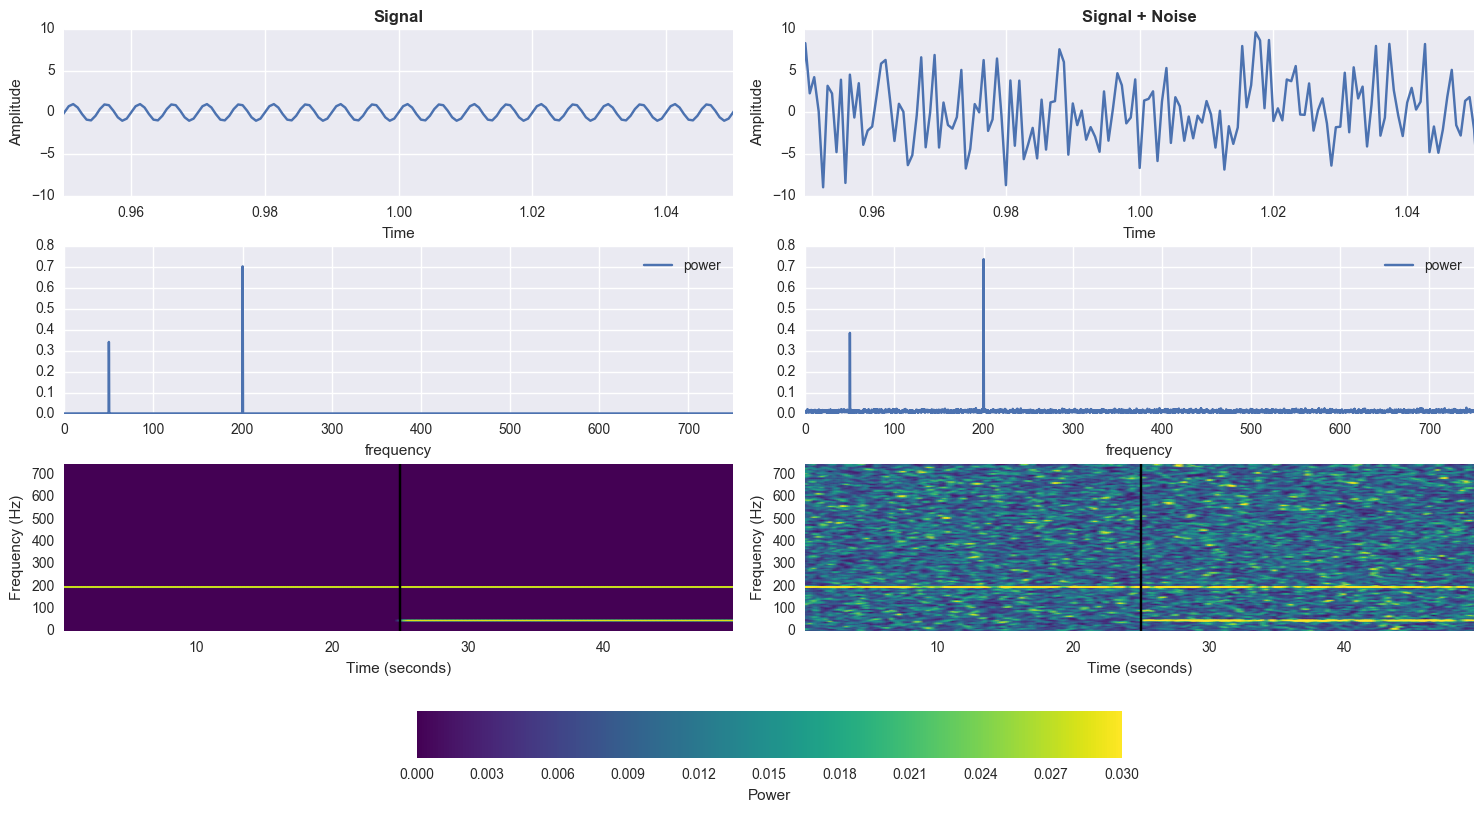

In [6]:
frequency_of_interest1 = 200
frequency_of_interest2 = 50
sampling_frequency = 1500
time_extent = (0, 50)
num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points, endpoint=True)
signal1 = np.sin(2 * np.pi * time * frequency_of_interest1)
signal2 = np.sin(2 * np.pi * time * frequency_of_interest2)
signal2[:int(np.fix(num_time_points / 2))] = 0 
noise = np.random.normal(0, 4, len(signal1))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].plot(time, signal1 + signal2)
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].set_xlim((0.95, 1.05))
axes[0, 0].set_ylim((-10, 10))

axes[0, 1].plot(time, signal1 + signal2 + noise)
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].set_xlim((0.95, 1.05))
axes[0, 1].set_ylim((-10, 10))

psd = spectral.multitaper_power_spectral_density(signal1 + signal2, sampling_frequency,
                                                 number_of_tapers=10,
                                                 time_halfbandwidth_product=20).plot(ax=axes[1, 0])

psd = spectral.multitaper_power_spectral_density(signal1 + signal2 + noise, sampling_frequency,
                                                 number_of_tapers=10,
                                                 time_halfbandwidth_product=20).plot(ax=axes[1, 1])

spectrogram = spectral.multitaper_spectrogram(signal1 + signal2,
                                              sampling_frequency=sampling_frequency,
                                              time_window_duration=0.600,
                                              time_window_step=0.300,
                                              time_halfbandwidth_product=3,
                                              time=time)
spectral.plot_spectrogram(spectrogram, axes[2, 0], vmin=0, vmax=0.03)
axes[2, 0].axvline(time[int(np.fix(num_time_points / 2))], color='black')


spectrogram = spectral.multitaper_spectrogram(signal1 + signal2 + noise,
                                              sampling_frequency=sampling_frequency,
                                              time_window_duration=0.600,
                                              time_window_step=0.300,
                                              time_halfbandwidth_product=3,
                                              time=time)
mesh = spectral.plot_spectrogram(spectrogram, axes[2, 1], vmin=0, vmax=0.03)
axes[2, 1].axvline(time[int(np.fix(num_time_points / 2))], color='black')
plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=15, pad=0.1, label='Power')
cb.outline.set_linewidth(0)

### With trial structure (time x trials)

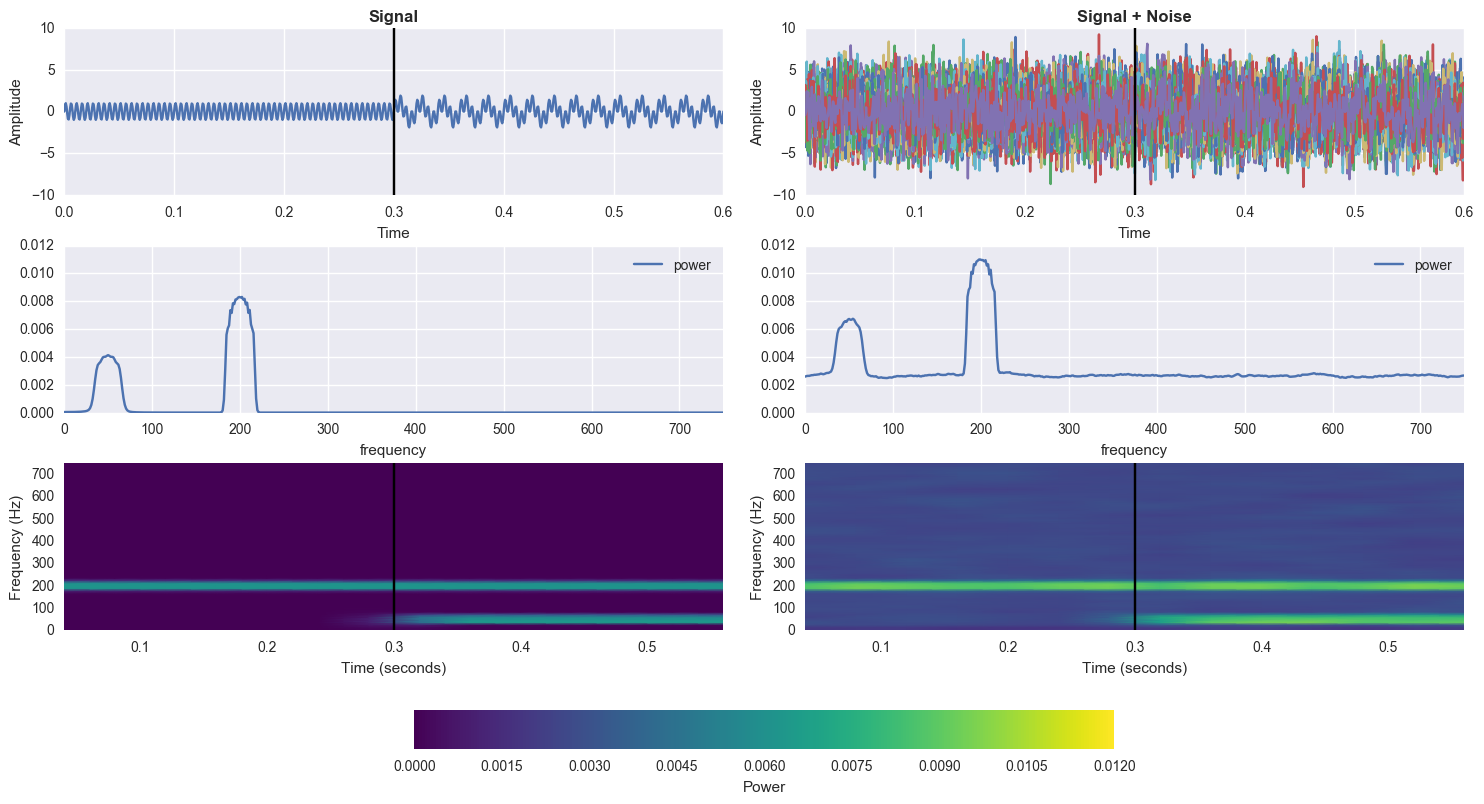

In [7]:
frequency_of_interest1 = 200
frequency_of_interest2 = 50
time_extent = (0, 0.600)
num_trials = 100
sampling_frequency = 1500
num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points, endpoint=True)
signal1 = np.sin(2 * np.pi * time * frequency_of_interest1)
signal2 = np.sin(2 * np.pi * time * frequency_of_interest2)
signal2[:int(np.fix(num_time_points / 2))] = 0 
noise = np.random.normal(0, 2, size=(len(signal1), num_trials))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

axes[0, 0].plot(time, signal1 + signal2)
axes[0, 0].set_ylim((-10, 10))
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].axvline(time[int(np.fix(num_time_points / 2))], color='black')


axes[0, 1].plot(time, signal1[:,np.newaxis] + signal2[:,np.newaxis] + noise)
axes[0, 1].set_ylim((-10, 10))
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].axvline(time[int(np.fix(num_time_points / 2))], color='black')

psd = spectral.multitaper_power_spectral_density(signal1 + signal2, sampling_frequency,
                                                 number_of_tapers=10,
                                                 time_halfbandwidth_product=20).plot(ax=axes[1, 0])
axes[1, 0].set_ylim((0, 0.012))

psd = spectral.multitaper_power_spectral_density(signal1[:,np.newaxis] + signal2[:,np.newaxis] + noise, sampling_frequency,
                                                 number_of_tapers=10,
                                                 time_halfbandwidth_product=20).plot(ax=axes[1, 1])
axes[1, 1].set_ylim((0, 0.012))

spectrogram = spectral.multitaper_spectrogram(signal1[:,np.newaxis] + signal2[:,np.newaxis],
                                              sampling_frequency=sampling_frequency,
                                              time_window_duration=0.080,
                                              time_window_step=0.040,
                                              desired_frequencies=None,
                                              time_halfbandwidth_product=2,
                                              time=time)
spectral.plot_spectrogram(spectrogram, axes[2, 0], vmin=0, vmax=0.012)
axes[2, 0].axvline(time[int(np.fix(num_time_points / 2))], color='black')

spectrogram = spectral.multitaper_spectrogram(signal1[:,np.newaxis] + signal2[:,np.newaxis] + noise,
                                              sampling_frequency=sampling_frequency,
                                              time_window_duration=0.080,
                                              time_window_step=0.040,
                                              time_halfbandwidth_product=2,
                                              time=time)
mesh = spectral.plot_spectrogram(spectrogram, axes[2, 1], vmin=0, vmax=0.012)
axes[2, 1].axvline(time[int(np.fix(num_time_points / 2))], color='black')
plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=18, pad=0.1, label='Power')
cb.outline.set_linewidth(0)


### Difference in Power

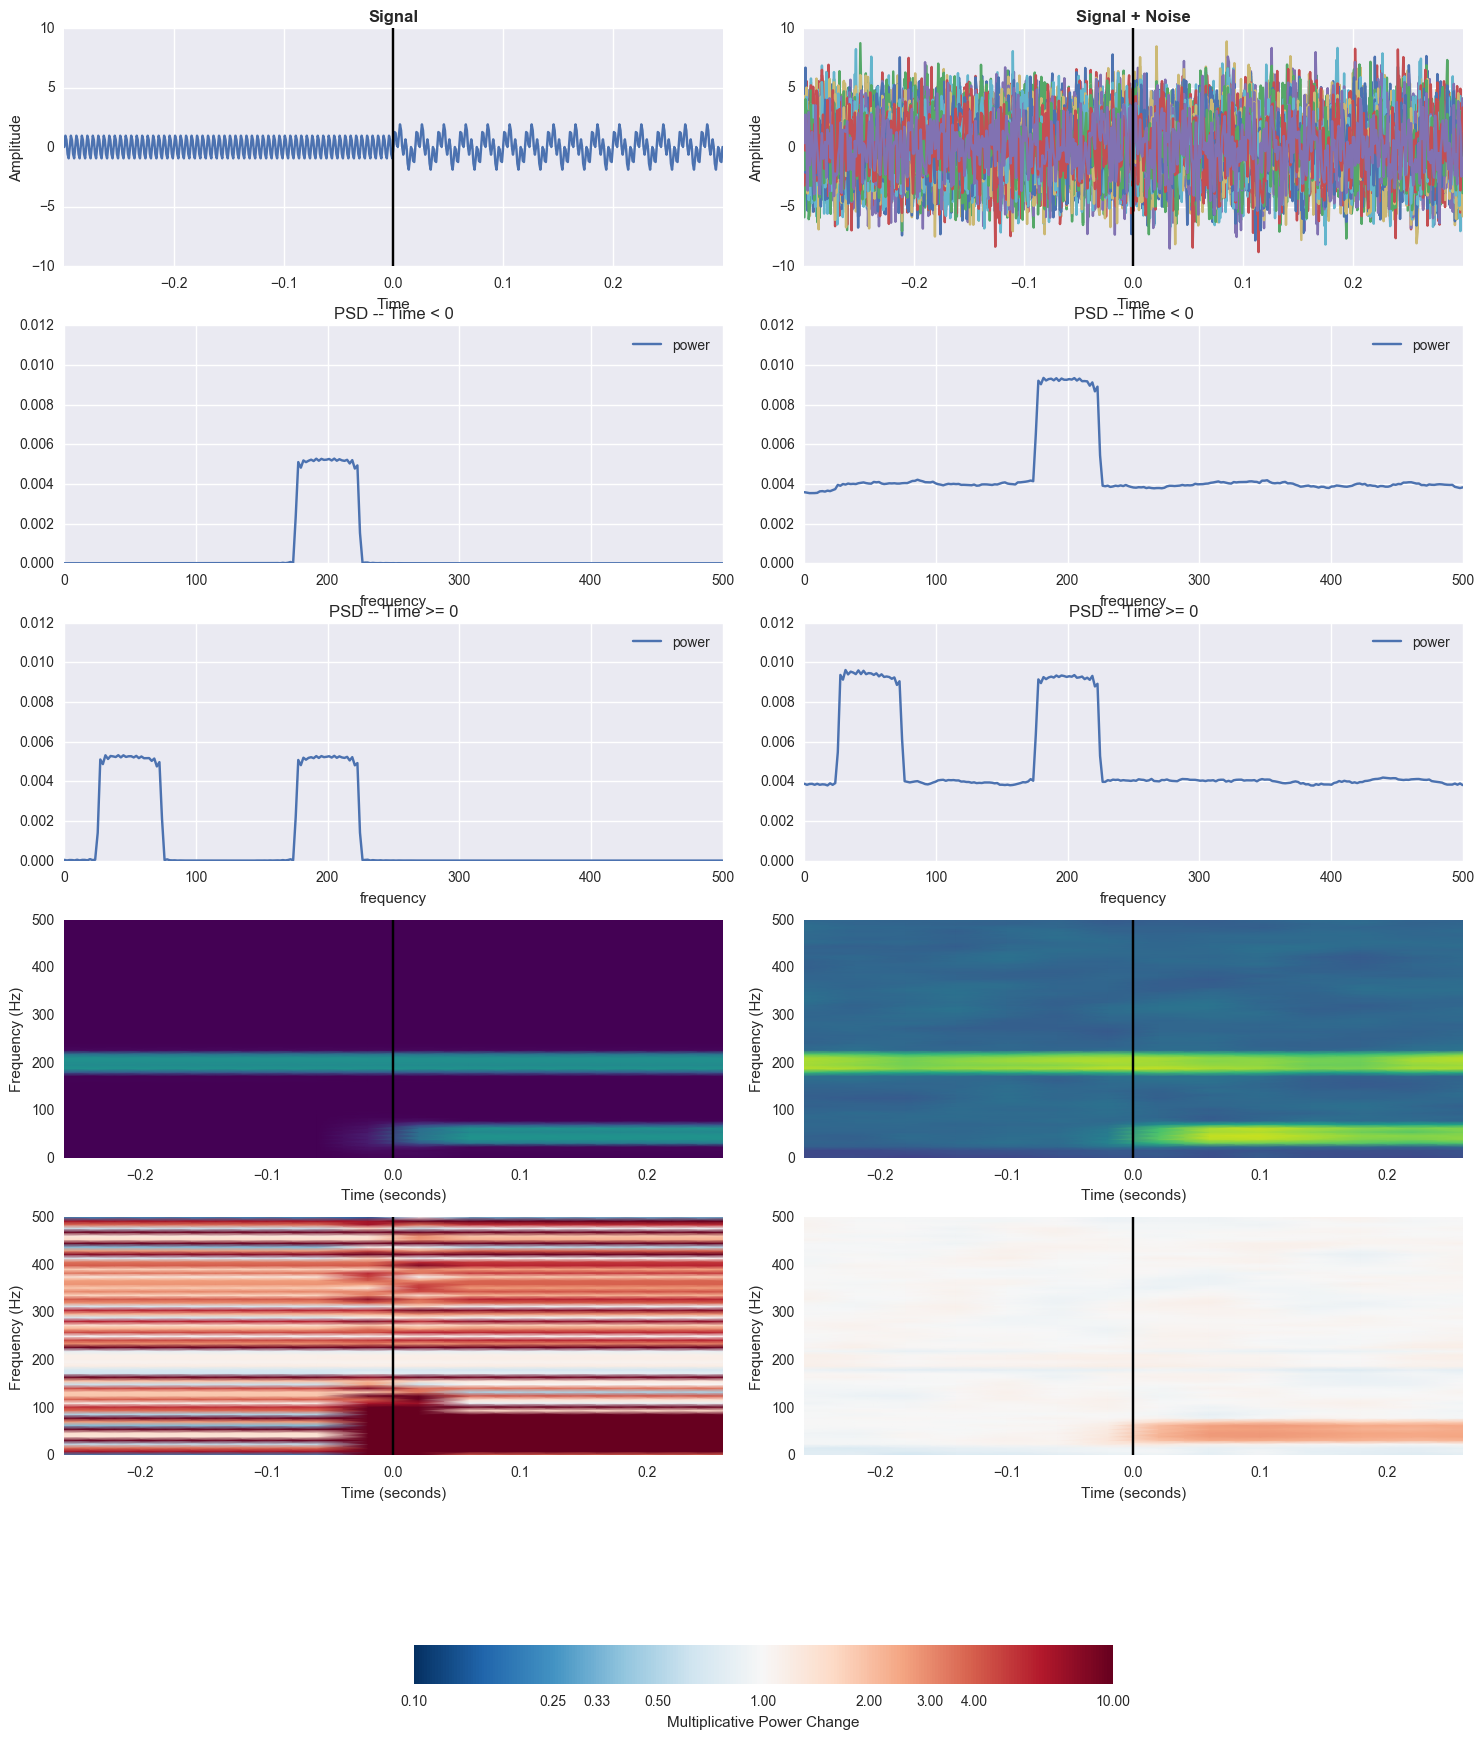

In [14]:
frequency_of_interest1 = 200
frequency_of_interest2 = 50
time_extent = (-.300, 0.300)
num_trials = 100
num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points, endpoint=True)
signal1 = np.sin(2 * np.pi * time * frequency_of_interest1)
signal2 = np.sin(2 * np.pi * time * frequency_of_interest2)
signal2[:int(np.fix(num_time_points / 2))] = 0 
noise = np.random.normal(0, 2, size=(len(signal1), num_trials))
signal = signal1 + signal2
data = signal1[:,np.newaxis] + signal2[:,np.newaxis] + noise
time_before = time < 0
time_after = time >= 0

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

axes[0, 0].plot(time, signal1 + signal2)
axes[0, 0].set_ylim((-10, 10))
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Signal', fontweight='bold')
axes[0, 0].axvline(time[int(np.fix(num_time_points / 2))], color='black')

axes[0, 1].plot(time, data)
axes[0, 1].set_ylim((-10, 10))
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_title('Signal + Noise', fontweight='bold')
axes[0, 1].axvline(time[int(np.fix(num_time_points / 2))], color='black')

# PSD Before
psd_signal_before = spectral.multitaper_power_spectral_density(signal[time_before], sampling_frequency,
                                                 time_halfbandwidth_product=7.5)
psd_signal_before.plot(ax=axes[1, 0])
axes[1, 0].set_ylim((0, 0.012))
axes[1, 0].set_title('PSD -- Time < 0')

psd_data_before = spectral.multitaper_power_spectral_density(data[time_before, :],
                                                             sampling_frequency=sampling_frequency,
                                                             time_halfbandwidth_product=7.5)
psd_data_before.plot(ax=axes[1, 1])
axes[1, 1].set_ylim((0, 0.012))
axes[1, 1].set_title('PSD -- Time < 0')

# PSD After
psd = spectral.multitaper_power_spectral_density(signal[time_after],
                                                 sampling_frequency=sampling_frequency,
                                                 time_halfbandwidth_product=7.5).plot(ax=axes[2, 0])
axes[2, 0].set_ylim((0, 0.012))
axes[2, 0].set_title('PSD -- Time >= 0')

psd = spectral.multitaper_power_spectral_density(data[time_after, :],
                                                 sampling_frequency=sampling_frequency,
                                                 time_halfbandwidth_product=7.5).plot(ax=axes[2, 1])
axes[2, 1].set_ylim((0, 0.012))
axes[2, 1].set_title('PSD -- Time >= 0')

# Spectrogram
spectrogram_signal = spectral.multitaper_spectrogram(signal,
                                                     sampling_frequency=sampling_frequency,
                                                     time_window_duration=0.080,
                                                     time_window_step=0.040,
                                                     time_halfbandwidth_product=2,
                                                     time=time)
spectral.plot_spectrogram(spectrogram_signal, axes[3, 0], vmin=0, vmax=0.012)
axes[3, 0].axvline(time[int(np.fix(num_time_points / 2))], color='black')

spectrogram_data = spectral.multitaper_spectrogram(data,
                                                   sampling_frequency=sampling_frequency,
                                                   time_window_duration=0.080,
                                                   time_window_step=0.040,
                                                   time_halfbandwidth_product=2,
                                                   time=time)
spectral.plot_spectrogram(spectrogram_data, axes[3, 1], vmin=0, vmax=0.012)
axes[3, 1].axvline(time[int(np.fix(num_time_points / 2))], color='black')

# Change in power
change_in_power_signal = spectral.normalize_power_by_baseline(spectrogram_signal, psd_signal_before)
spectral.plot_spectrogram(change_in_power_signal, axes[4, 0],
                                 vmin=1E-1, vmax=1E1, plot_type='change',
                                 cmap='RdBu_r')
axes[4, 0].axvline(time[int(np.fix(num_time_points / 2))], color='black')

change_in_power_data = spectral.normalize_power_by_baseline(spectrogram_data, psd_data_before)
mesh = spectral.plot_spectrogram(change_in_power_data, axes[4, 1],
                                 vmin=1E-1, vmax=1E1, plot_type='change',
                                 cmap='RdBu_r')
axes[4, 1].axvline(time[int(np.fix(num_time_points / 2))], color='black')

plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=18, pad=0.1, label='Multiplicative Power Change', format='%.2f')
cb.outline.set_linewidth(0)
cb.set_ticks([1/10, 1/4, 1/3, 1/2, 1, 2, 3, 4, 10])


## Coherence

### No trials, 200 Hz, $\pi / 2$ phase offset

(0, 1)

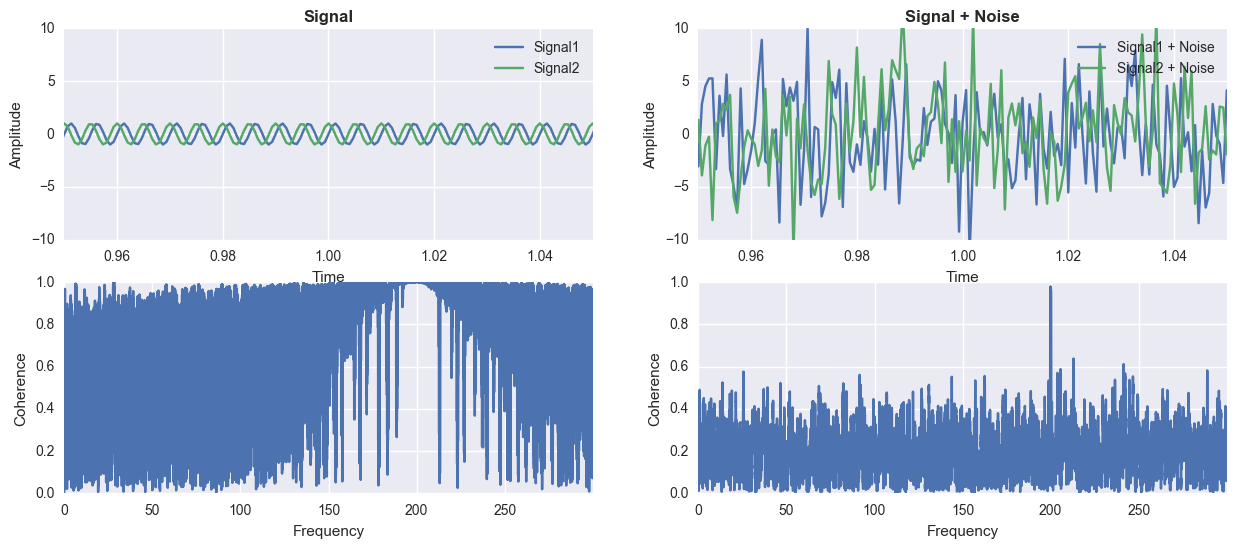

In [9]:
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 50)
num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points, endpoint=True)
signal1 = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.pi / 2
signal2 = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise1 = np.random.normal(0, 4, len(signal1))
noise2 = np.random.normal(0, 4, len(signal1))

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.title('Signal', fontweight='bold')
plt.plot(time, signal1, label='Signal1')
plt.plot(time, signal2, label='Signal2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Signal + Noise', fontweight='bold')
plt.plot(time, signal1 + noise1, label='Signal1 + Noise')
plt.plot(time, signal2 + noise2, label='Signal2 + Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))
plt.legend()

ax = plt.subplot(2, 2, 3)
coh = spectral.multitaper_coherence([signal1, signal2],
                                    number_of_tapers=20,
                                    time_halfbandwidth_product=20,
                                    desired_frequencies=[0, 300],
                                    sampling_frequency=sampling_frequency)
coh.plot(y='coherence_magnitude', ax=ax, legend=False)
ax.set_xlabel('Frequency')
ax.set_ylabel('Coherence')
ax.set_ylim((0, 1))

ax = plt.subplot(2, 2, 4)
coh = spectral.multitaper_coherence([signal1 + noise1, signal2 + noise2],
                                    number_of_tapers=20,
                                    time_halfbandwidth_product=20,
                                    desired_frequencies=[0, 300],
                                    sampling_frequency=sampling_frequency)
coh.plot(y='coherence_magnitude', ax=ax, legend=False)
ax.set_xlabel('Frequency')
ax.set_ylabel('Coherence')
ax.set_ylim((0, 1))


### With trial structure (time x trials), 200 Hz, $\pi / 2$ phase offset

(0, 1)

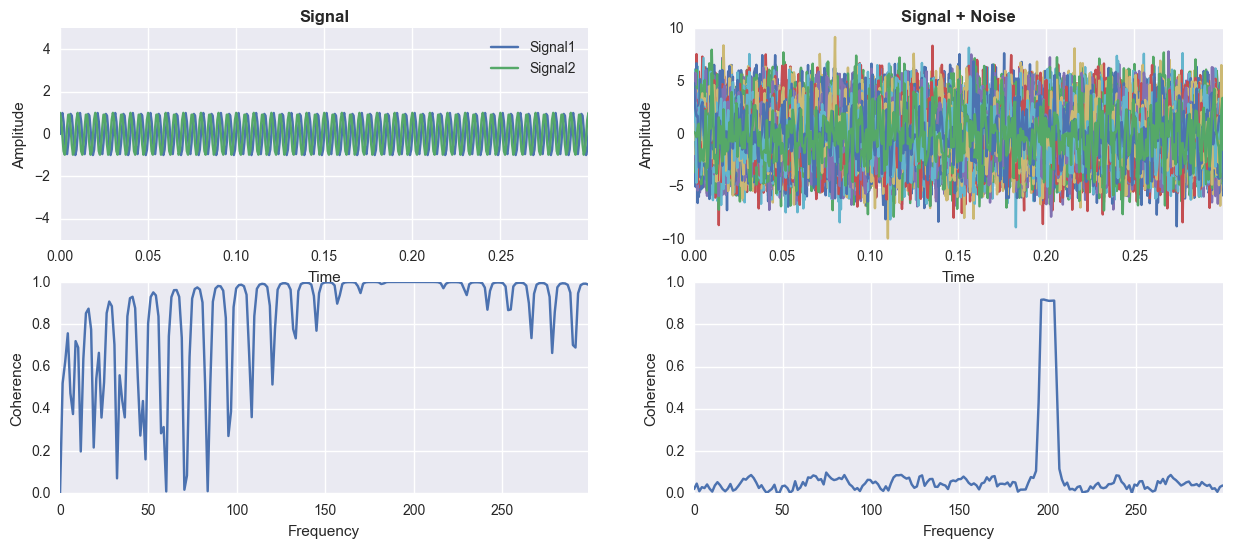

In [10]:
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 0.600)
num_trials = 100
num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points, endpoint=True)
signal1 = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.pi/ 2
signal2 = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise1 = np.random.normal(0, 2, size=(len(signal1), num_trials))
noise2 = np.random.normal(0, 2, size=(len(signal1), num_trials))
data1 = signal1[:,np.newaxis] + noise1
data2 = signal2[:,np.newaxis] + noise2

time_halfbandwidth_product = 3
desired_frequencies=[0, 300]

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.title('Signal', fontweight='bold')
plt.plot(time, signal1, label='Signal1')
plt.plot(time, signal2, label='Signal2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim((0.00, 0.30))
plt.ylim((-5, 5))
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Signal + Noise', fontweight='bold')
plt.plot(time, signal1[:,np.newaxis] + noise1, label='Signal1 + Noise')
plt.plot(time, signal2[:,np.newaxis] + noise2, label='Signal2 + Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim((0.00, 0.30))
plt.ylim((-10, 10))

ax = plt.subplot(2, 2, 3)
coh = spectral.multitaper_coherence([signal1, signal2],
                                    time_halfbandwidth_product=time_halfbandwidth_product,
                                    desired_frequencies=desired_frequencies,
                                    sampling_frequency=sampling_frequency)
coh.plot(y='coherence_magnitude', ax=ax, legend=False)
ax.set_xlabel('Frequency')
ax.set_ylabel('Coherence')
ax.set_ylim((0, 1))

ax = plt.subplot(2, 2, 4)
coh = spectral.multitaper_coherence([signal1[:,np.newaxis] + noise1, signal2[:,np.newaxis] + noise2],
                                    time_halfbandwidth_product=time_halfbandwidth_product,
                                    desired_frequencies=desired_frequencies,
                                    sampling_frequency=sampling_frequency)
coh.plot(y='coherence_magnitude', ax=ax, legend=False)
ax.set_xlabel('Frequency')
ax.set_ylabel('Coherence')
ax.set_ylim((0, 1))

# scipy.io.savemat('test_coherence', {'frequency_of_interest': frequency_of_interest,
#                                     'sampling_frequency': sampling_frequency,
#                                     'time_extent': time_extent,
#                                     'time': time,
#                                     'phase_offset': phase_offset,
#                                     'data1': data1,
#                                     'data2': data2,
#                                     'time_halfbandwidth_product': time_halfbandwidth_product,
#                                     'desired_frequencies': desired_frequencies,
#                                     'pad': pad})


### Coherogram

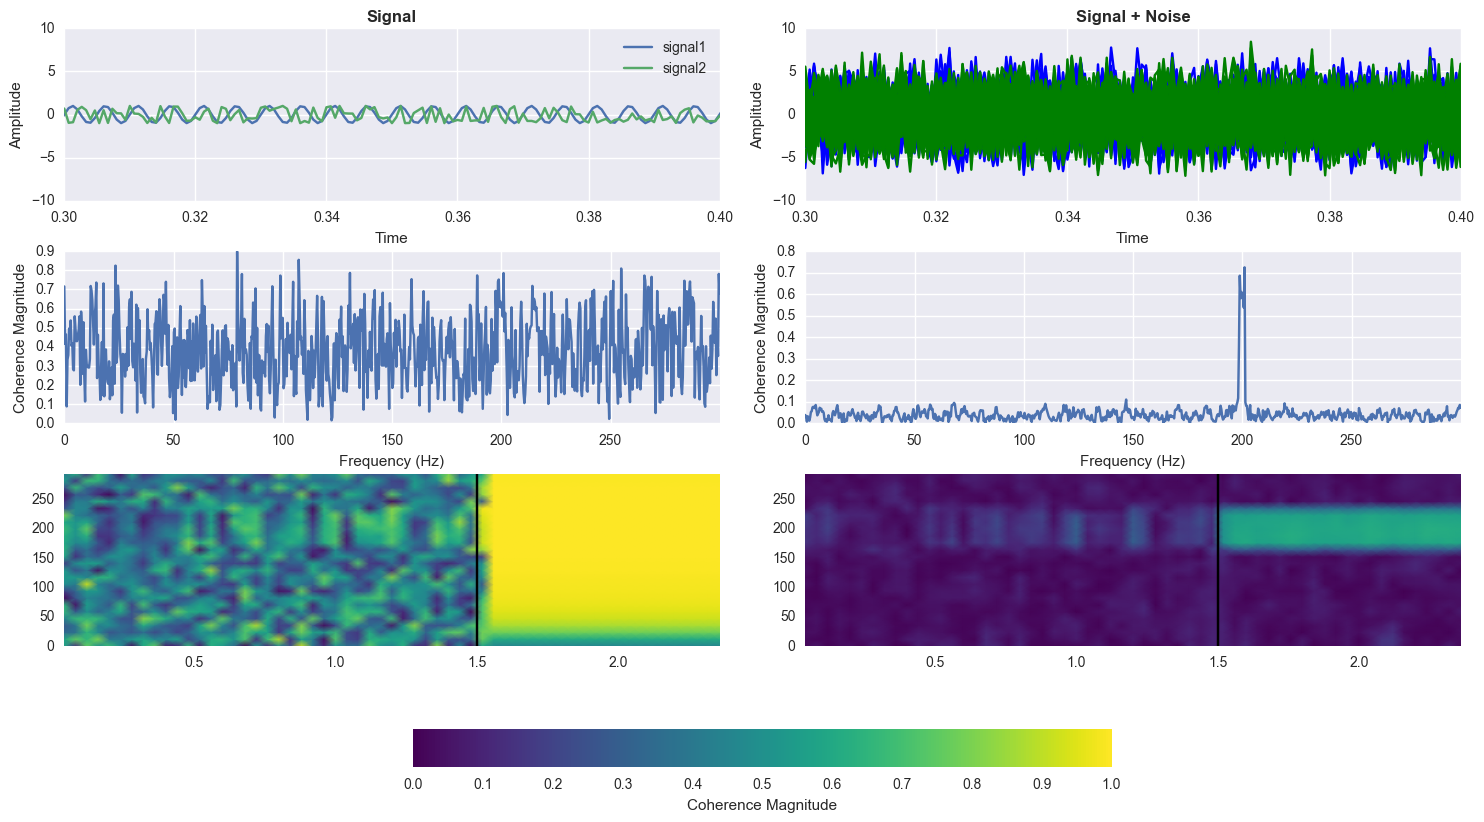

In [11]:
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
num_trials = 100
num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points, endpoint=True)
signal1 = np.sin(2 * np.pi * time * frequency_of_interest)
# Randomized phase until time > 1.5
phase_offset = np.random.uniform(-np.pi, np.pi, size=time.shape)
phase_offset[np.where(time > 1.5)] = np.pi / 2
signal2 = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise1 = np.random.normal(0, 2, size=(len(signal1), num_trials))
noise2 = np.random.normal(0, 2, size=(len(signal1), num_trials))
data1 = signal1[:,np.newaxis] + noise1
data2 = signal2[:,np.newaxis] + noise2

time_halfbandwidth_product = 3
desired_frequencies=[0, 300]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0,0].plot(time, signal1, label='signal1')
axes[0,0].plot(time, signal2, label='signal2')
axes[0,0].set_title('Signal', fontweight='bold')
axes[0,0].set_xlim((0.3, 0.4))
axes[0,0].set_ylim((-10, 10))
axes[0,0].set_xlabel('Time')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].legend()

axes[0,1].plot(time, data1, color='blue')
axes[0,1].plot(time, data2, color='green')
axes[0,1].set_title('Signal + Noise', fontweight='bold')
axes[0,1].set_xlim((0.3, 0.4))
axes[0,1].set_ylim((-10, 10))
axes[0,1].set_xlabel('Time')
axes[0,1].set_ylabel('Amplitude')

coh = spectral.multitaper_coherence([signal1, signal2],
                                    time_halfbandwidth_product=time_halfbandwidth_product,
                                    sampling_frequency=sampling_frequency,
                                    desired_frequencies=desired_frequencies)
coh.plot(y='coherence_magnitude', ax=axes[1,0], legend=False)
axes[1,0].set_xlabel('Frequency (Hz)')
axes[1,0].set_ylabel('Coherence Magnitude')

coh = spectral.multitaper_coherence([data1, data2],
                                    time_halfbandwidth_product=time_halfbandwidth_product,
                                    desired_frequencies=desired_frequencies,
                                    sampling_frequency=sampling_frequency)
coh.plot(y='coherence_magnitude', ax=axes[1,1], legend=False)
axes[1,1].set_xlabel('Frequency (Hz)')
axes[1,1].set_ylabel('Coherence Magnitude')

coherogram = spectral.multitaper_coherogram([signal1, signal2],
                                            time_window_duration=0.080,
                                            time_window_step=0.040,
                                            time_halfbandwidth_product=time_halfbandwidth_product,
                                            desired_frequencies=desired_frequencies,
                                            sampling_frequency=sampling_frequency,
                                            time=time)
spectral.plot_coherogram(coherogram, axes[2,0], vmin=0, vmax=1)
axes[2,0].axvline(1.5, color='black')

coherogram = spectral.multitaper_coherogram([data1, data2],
                                            time_window_duration=0.080,
                                            time_window_step=0.040,
                                            time_halfbandwidth_product=time_halfbandwidth_product,
                                            desired_frequencies=desired_frequencies,
                                            sampling_frequency=sampling_frequency,
                                            time=time)
mesh = spectral.plot_coherogram(coherogram, axes[2,1], vmin=0, vmax=1)
axes[2,1].axvline(1.5, color='black')
plt.tight_layout()
cb = fig.colorbar(mesh, ax=axes.ravel().tolist(), orientation='horizontal',
                  shrink=.5, aspect=18, pad=0.1, label='Coherence Magnitude')
cb.outline.set_linewidth(0)

### Difference in Coherence

## Group Delay
### Gaussian Noise

correlation,delay,number_of_points,slope
0.215296,0.274573,11,0.174799


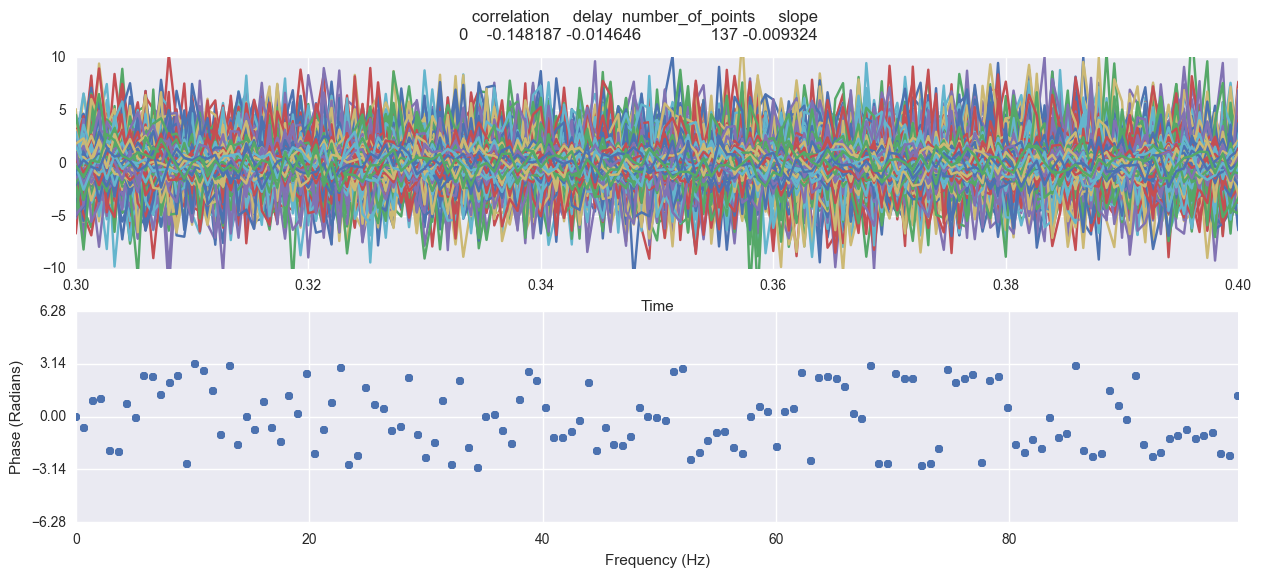

In [12]:
sampling_frequency = 1500
time_extent = (0, 1)
num_trials = 100
time_halfbandwidth_product = 1
desired_frequencies = [0, 100]
group_delay_frequencies = [2, 10]
num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points, endpoint=True)
noise1 = np.random.normal(0, 3, size=(len(time), num_trials))
noise2 = np.random.normal(0, 1, size=(len(time), num_trials))


plt.figure(figsize=(15, 6))
ax = plt.subplot(2, 1, 1)
plt.plot(time, noise1)
plt.plot(time, noise2)
plt.xlim((0.3, 0.4))
plt.ylim((-10, 10))
ax.set_xlabel('Time')

ax = plt.subplot(2, 1, 2)
coh = spectral.multitaper_coherence([noise1, noise2],
                                    time_halfbandwidth_product=time_halfbandwidth_product,
                                    desired_frequencies=desired_frequencies,
                                    sampling_frequency=sampling_frequency)
coh.plot(y='coherence_phase', marker='8', style='.', ax=ax, legend=False)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (Radians)')
ax.set_yticks([-2 * np.pi, -1 * np.pi, 0, np.pi, 2 * np.pi])

group_delay = spectral.group_delay(spectral.multitaper_coherence([noise1, noise2],
                                           time_halfbandwidth_product=time_halfbandwidth_product,
                                           desired_frequencies=group_delay_frequencies,
                                           sampling_frequency=sampling_frequency))
plt.suptitle(spectral.group_delay(coh))
IPython.display.HTML(group_delay.to_html(index=False))

### Signal1 Leads Signal2

correlation,delay,number_of_points,slope
-0.999997,-0.291432,8,-0.185531


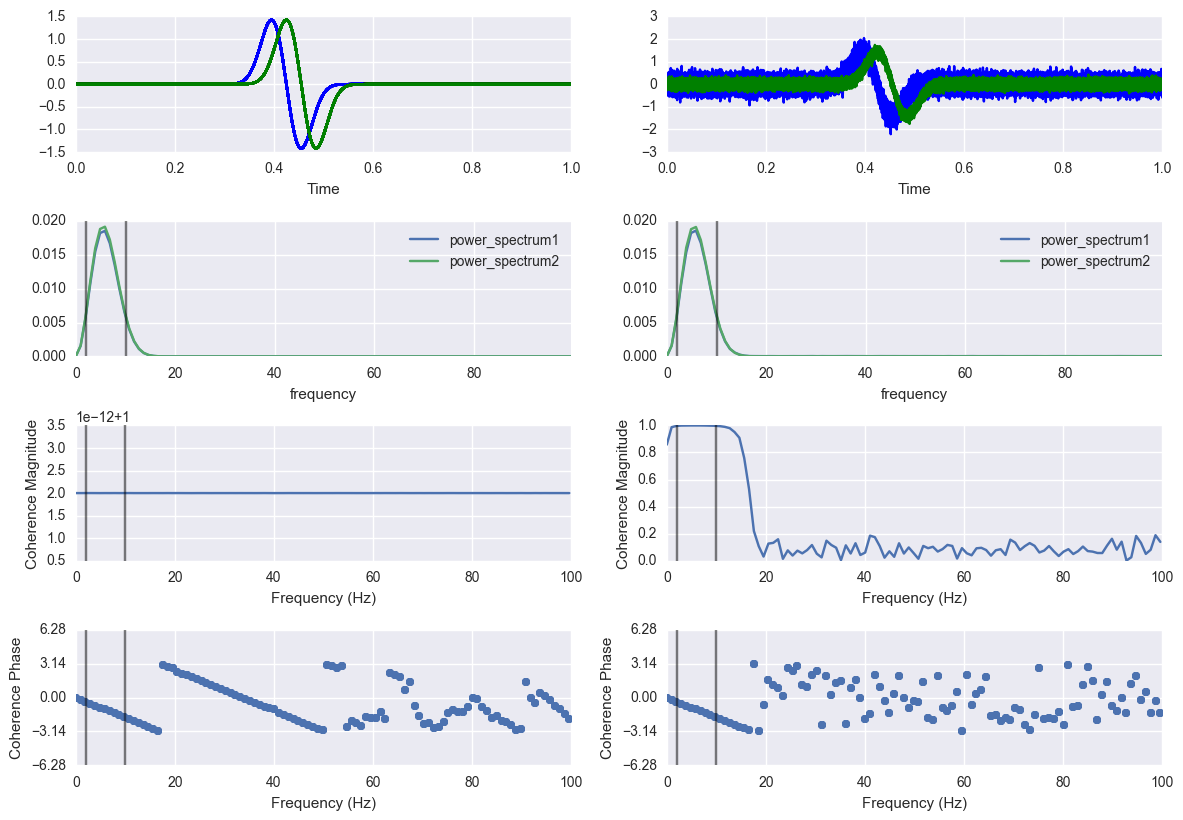

In [13]:
sampling_frequency = 1000
time_extent = (0, 1)
num_trials = 100
time_halfbandwidth_product = 1
desired_frequencies = [0, 100]
group_delay_frequencies = [2, 10]

num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points)

signal1 = (scipy.stats.norm.pdf(time, .40, .025) - scipy.stats.norm.pdf(time, .45, .025)) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), num_trials))
signal2 = (scipy.stats.norm.pdf(time, .43, .025) - scipy.stats.norm.pdf(time, .48, .025)) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), num_trials))

noise1 = np.random.normal(0, .2, size=(len(time), num_trials))
noise2 = np.random.normal(0, .1, size=(len(time), num_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

fig, axis_handles = plt.subplots(4, 2, figsize=(12, 9))
axis_handles[0, 0].plot(time, signal1, color='blue');
axis_handles[0, 0].plot(time, signal2, color='green');
axis_handles[0, 0].set_xlabel('Time')

axis_handles[0, 1].plot(time, data1, color='blue');
axis_handles[0, 1].plot(time, data2, color='green');
axis_handles[0, 1].set_xlabel('Time')

coh_signal = spectral.multitaper_coherence([signal1, signal2],
                                           time_halfbandwidth_product=time_halfbandwidth_product,
                                           desired_frequencies=desired_frequencies,
                                           sampling_frequency=sampling_frequency)

coh_signal.plot(y=['power_spectrum1', 'power_spectrum2'], ax=axis_handles[1, 0])
axis_handles[1, 0].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[1, 0].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

coh_signal.plot(y='coherence_magnitude', ax=axis_handles[2, 0], legend=False)
axis_handles[2, 0].set_xlabel('Frequency (Hz)')
axis_handles[2, 0].set_ylabel('Coherence Magnitude')
axis_handles[2, 0].set_xlim(desired_frequencies)
axis_handles[2, 0].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[2, 0].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

coh_signal.plot(y='coherence_phase', marker='8', style='.', ax=axis_handles[3, 0], legend=False)
axis_handles[3, 0].set_xlabel('Frequency (Hz)')
axis_handles[3, 0].set_ylabel('Coherence Phase')
axis_handles[3, 0].set_ylim((-2 * np.pi, 2 * np.pi))
axis_handles[3, 0].set_yticks([-2 * np.pi, -1 * np.pi, 0, np.pi, 2 * np.pi])
axis_handles[3, 0].set_xlim(desired_frequencies)
axis_handles[3, 0].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[3, 0].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

coh_data = spectral.multitaper_coherence([data1, data2],
                                         time_halfbandwidth_product=time_halfbandwidth_product,
                                         desired_frequencies=desired_frequencies,
                                         sampling_frequency=sampling_frequency)

coh_data.plot(y=['power_spectrum1', 'power_spectrum2'], ax=axis_handles[1, 1])
axis_handles[1, 1].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[1, 1].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

coh_data.plot(y='coherence_magnitude', ax=axis_handles[2, 1], legend=False)
axis_handles[2, 1].set_xlabel('Frequency (Hz)')
axis_handles[2, 1].set_ylabel('Coherence Magnitude')
axis_handles[2, 1].set_xlim(desired_frequencies)
axis_handles[2, 1].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[2, 1].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

coh_data.plot(y='coherence_phase', marker='8', style='.', ax=axis_handles[3, 1], legend=False)
axis_handles[3, 1].set_xlabel('Frequency (Hz)')
axis_handles[3, 1].set_ylabel('Coherence Phase')
axis_handles[3, 1].set_ylim((-2 * np.pi, 2 * np.pi))
axis_handles[3, 1].set_yticks([-2 * np.pi, -1 * np.pi, 0, np.pi, 2 * np.pi])
axis_handles[3, 1].set_xlim(desired_frequencies)
axis_handles[3, 1].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[3, 1].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

group_delay = spectral.group_delay(spectral.multitaper_coherence([signal1, signal2],
                                           time_halfbandwidth_product=time_halfbandwidth_product,
                                           desired_frequencies=group_delay_frequencies,
                                           sampling_frequency=sampling_frequency))

plt.tight_layout()
plt.subplots_adjust(top=0.90)
IPython.display.HTML(group_delay.to_html(index=False))

### Signal2 leads Signal1

correlation,delay,number_of_points,slope
0.999991,0.290812,11,0.185137


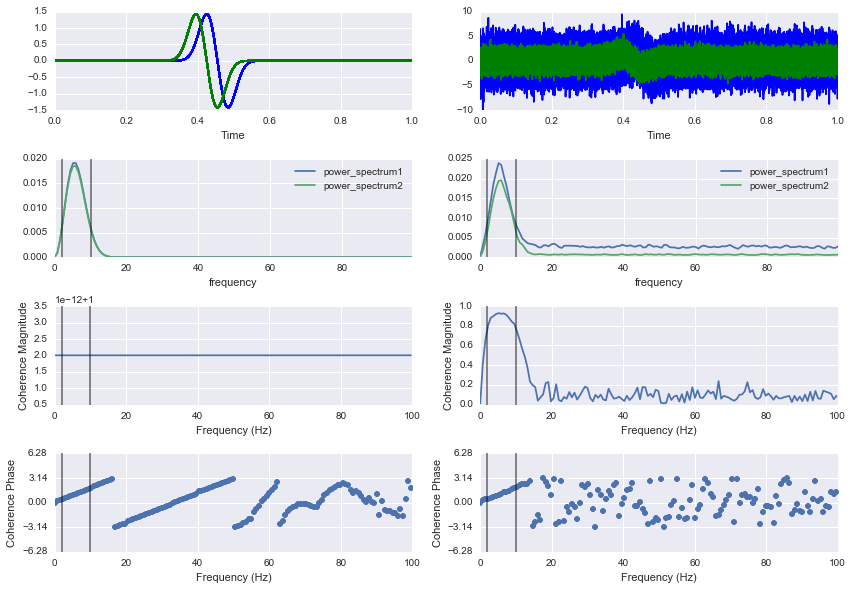

In [85]:
sampling_frequency = 1500
time_extent = (0, 1)
num_trials = 100
time_halfbandwidth_product = 1
desired_frequencies = [0, 100]
group_delay_frequencies = [2, 10]

num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points)

signal1 = (scipy.stats.norm.pdf(time, .43, .025) - scipy.stats.norm.pdf(time, .48, .025)) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), num_trials))
signal2 = (scipy.stats.norm.pdf(time, .40, .025) - scipy.stats.norm.pdf(time, .45, .025)) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), num_trials))

noise1 = np.random.normal(0, 2, size=(len(time), num_trials))
noise2 = np.random.normal(0, 1, size=(len(time), num_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

fig, axis_handles = plt.subplots(4, 2, figsize=(12, 9))
axis_handles[0, 0].plot(time, signal1, color='blue');
axis_handles[0, 0].plot(time, signal2, color='green');
axis_handles[0, 0].set_xlabel('Time')

axis_handles[0, 1].plot(time, data1, color='blue');
axis_handles[0, 1].plot(time, data2, color='green');
axis_handles[0, 1].set_xlabel('Time')

coh_signal = spectral.multitaper_coherence([signal1, signal2],
                                           time_halfbandwidth_product=time_halfbandwidth_product,
                                           desired_frequencies=desired_frequencies,
                                           sampling_frequency=sampling_frequency)

coh_signal.plot(y=['power_spectrum1', 'power_spectrum2'], ax=axis_handles[1, 0])
axis_handles[1, 0].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[1, 0].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

coh_signal.plot(y='coherence_magnitude', ax=axis_handles[2, 0], legend=False)
axis_handles[2, 0].set_xlabel('Frequency (Hz)')
axis_handles[2, 0].set_ylabel('Coherence Magnitude')
axis_handles[2, 0].set_xlim(desired_frequencies)
axis_handles[2, 0].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[2, 0].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

coh_signal.plot(y='coherence_phase', marker='8', style='.', ax=axis_handles[3, 0], legend=False)
axis_handles[3, 0].set_xlabel('Frequency (Hz)')
axis_handles[3, 0].set_ylabel('Coherence Phase')
axis_handles[3, 0].set_ylim((-2 * np.pi, 2 * np.pi))
axis_handles[3, 0].set_yticks([-2 * np.pi, -1 * np.pi, 0, np.pi, 2 * np.pi])
axis_handles[3, 0].set_xlim(desired_frequencies)
axis_handles[3, 0].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[3, 0].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

coh_data = spectral.multitaper_coherence([data1, data2],
                                         time_halfbandwidth_product=time_halfbandwidth_product,
                                         desired_frequencies=desired_frequencies,
                                         sampling_frequency=sampling_frequency)

coh_data.plot(y=['power_spectrum1', 'power_spectrum2'], ax=axis_handles[1, 1])
axis_handles[1, 1].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[1, 1].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

coh_data.plot(y='coherence_magnitude', ax=axis_handles[2, 1], legend=False)
axis_handles[2, 1].set_xlabel('Frequency (Hz)')
axis_handles[2, 1].set_ylabel('Coherence Magnitude')
axis_handles[2, 1].set_xlim(desired_frequencies)
axis_handles[2, 1].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[2, 1].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

coh_data.plot(y='coherence_phase', marker='8', style='.', ax=axis_handles[3, 1], legend=False)
axis_handles[3, 1].set_xlabel('Frequency (Hz)')
axis_handles[3, 1].set_ylabel('Coherence Phase')
axis_handles[3, 1].set_ylim((-2 * np.pi, 2 * np.pi))
axis_handles[3, 1].set_yticks([-2 * np.pi, -1 * np.pi, 0, np.pi, 2 * np.pi])
axis_handles[3, 1].set_xlim(desired_frequencies)
axis_handles[3, 1].axvline(group_delay_frequencies[0], color='black', alpha=0.5)
axis_handles[3, 1].axvline(group_delay_frequencies[1], color='black', alpha=0.5)

group_delay = spectral.group_delay(spectral.multitaper_coherence([signal1, signal2],
                                           time_halfbandwidth_product=time_halfbandwidth_product,
                                           desired_frequencies=group_delay_frequencies,
                                           sampling_frequency=sampling_frequency))

plt.tight_layout()
plt.subplots_adjust(top=0.90)
IPython.display.HTML(group_delay.to_html(index=False))

### Longer delay (0.2)

correlation,delay,number_of_points,slope
-0.111201,-0.144523,11,-0.092006


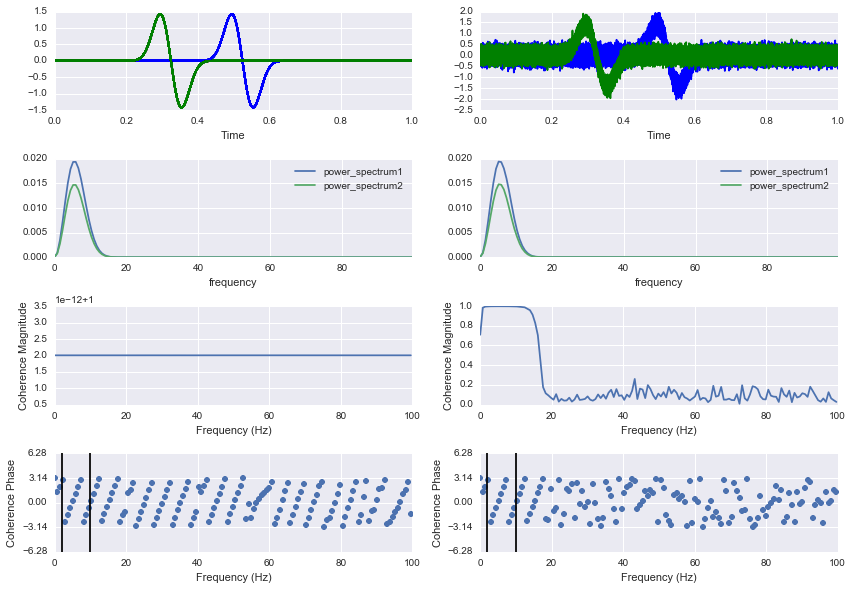

In [86]:
sampling_frequency = 1500
time_extent = (0, 1)
num_trials = 100
time_halfbandwidth_product = 1
desired_frequencies = [0, 100]
group_delay_frequencies = [2, 10]

num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points)

signal1 = (scipy.stats.norm.pdf(time, .50, .025) - scipy.stats.norm.pdf(time, .55, .025)) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), num_trials))
signal2 = (scipy.stats.norm.pdf(time, .30, .025) - scipy.stats.norm.pdf(time, .35, .025)) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), num_trials))

noise1 = np.random.normal(0, .18, size=(len(time), num_trials))
noise2 = np.random.normal(0, .16, size=(len(time), num_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

fig, axis_handles = plt.subplots(4, 2, figsize=(12, 9))
axis_handles[0, 0].plot(time, signal1, color='blue');
axis_handles[0, 0].plot(time, signal2, color='green');
axis_handles[0, 0].set_xlabel('Time')

axis_handles[0, 1].plot(time, data1, color='blue');
axis_handles[0, 1].plot(time, data2, color='green');
axis_handles[0, 1].set_xlabel('Time')

coh_signal = spectral.multitaper_coherence([signal1, signal2],
                                           time_halfbandwidth_product=time_halfbandwidth_product,
                                           desired_frequencies=desired_frequencies,
                                           sampling_frequency=sampling_frequency)

coh_signal.plot(y=['power_spectrum1', 'power_spectrum2'], ax=axis_handles[1, 0])

coh_signal.plot(y='coherence_magnitude', ax=axis_handles[2, 0], legend=False)
axis_handles[2, 0].set_xlabel('Frequency (Hz)')
axis_handles[2, 0].set_ylabel('Coherence Magnitude')
axis_handles[2, 0].set_xlim(desired_frequencies)

coh_signal.plot(y='coherence_phase', marker='8', style='.', ax=axis_handles[3, 0], legend=False)
axis_handles[3, 0].set_xlabel('Frequency (Hz)')
axis_handles[3, 0].set_ylabel('Coherence Phase')
axis_handles[3, 0].set_ylim((-2 * np.pi, 2 * np.pi))
axis_handles[3, 0].set_yticks([-2 * np.pi, -1 * np.pi, 0, np.pi, 2 * np.pi])
axis_handles[3, 0].set_xlim(desired_frequencies)
axis_handles[3, 0].axvline(group_delay_frequencies[0], color='black')
axis_handles[3, 0].axvline(group_delay_frequencies[1], color='black')

coh_data = spectral.multitaper_coherence([data1, data2],
                                         time_halfbandwidth_product=time_halfbandwidth_product,
                                         desired_frequencies=desired_frequencies,
                                         sampling_frequency=sampling_frequency)

coh_data.plot(y=['power_spectrum1', 'power_spectrum2'], ax=axis_handles[1, 1])

coh_data.plot(y='coherence_magnitude', ax=axis_handles[2, 1], legend=False)
axis_handles[2, 1].set_xlabel('Frequency (Hz)')
axis_handles[2, 1].set_ylabel('Coherence Magnitude')
axis_handles[2, 1].set_xlim(desired_frequencies)

coh_data.plot(y='coherence_phase', marker='8', style='.', ax=axis_handles[3, 1], legend=False)
axis_handles[3, 1].set_xlabel('Frequency (Hz)')
axis_handles[3, 1].set_ylabel('Coherence Phase')
axis_handles[3, 1].set_ylim((-2 * np.pi, 2 * np.pi))
axis_handles[3, 1].set_yticks([-2 * np.pi, -1 * np.pi, 0, np.pi, 2 * np.pi])
axis_handles[3, 1].set_xlim(desired_frequencies)
axis_handles[3, 1].axvline(group_delay_frequencies[0], color='black')
axis_handles[3, 1].axvline(group_delay_frequencies[1], color='black')

group_delay = spectral.group_delay(spectral.multitaper_coherence([signal1, signal2],
                                           time_halfbandwidth_product=time_halfbandwidth_product,
                                           desired_frequencies=group_delay_frequencies,
                                           sampling_frequency=sampling_frequency))

plt.tight_layout()
plt.subplots_adjust(top=0.90)
IPython.display.HTML(group_delay.to_html(index=False))

### Group delay - Antiphase

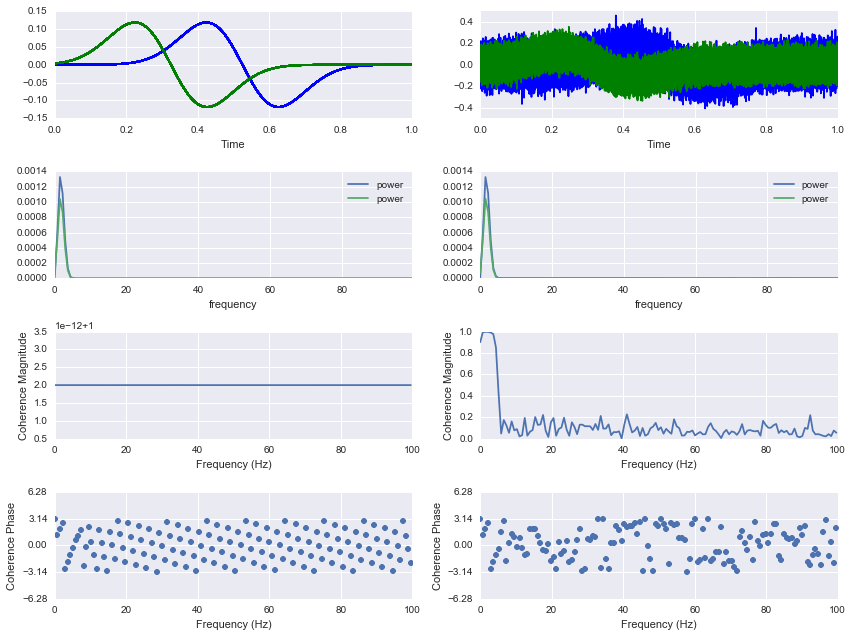

In [46]:
sampling_frequency = 1500
time_extent = (0, 1)
num_trials = 100
number_of_tapers = None
time_halfbandwidth_product = 1
desired_frequencies = [0, 100]
pad = 0

num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points)

signal1 = (scipy.stats.norm.pdf(time, .50, .1) - scipy.stats.norm.pdf(time, .55, .1)) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), num_trials))
signal2 = (scipy.stats.norm.pdf(time, .30, .1) - scipy.stats.norm.pdf(time, .35, .1)) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), num_trials))

noise1 = np.random.normal(0, .08, size=(len(time), num_trials))
noise2 = np.random.normal(0, .06, size=(len(time), num_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

fig, axis_handles = plt.subplots(4, 2, figsize=(12, 9))
axis_handles[0, 0].plot(time, signal1, color='blue');
axis_handles[0, 0].plot(time, signal2, color='green');
axis_handles[0, 0].set_xlabel('Time')

axis_handles[0, 1].plot(time, data1, color='blue');
axis_handles[0, 1].plot(time, data2, color='green');
axis_handles[0, 1].set_xlabel('Time')

spectral.multitaper_power_spectral_density(signal1, sampling_frequency,
                                                        number_of_tapers=number_of_tapers,
                                                        time_halfbandwidth_product=time_halfbandwidth_product,
                                                        desired_frequencies=desired_frequencies).plot(ax=axis_handles[1, 0])

spectral.multitaper_power_spectral_density(signal2, sampling_frequency,
                                                        number_of_tapers=number_of_tapers,
                                                        time_halfbandwidth_product=time_halfbandwidth_product,
                                                        desired_frequencies=desired_frequencies).plot(ax=axis_handles[1, 0])


spectral.multitaper_power_spectral_density(data1, sampling_frequency,
                                                        number_of_tapers=number_of_tapers,
                                                        time_halfbandwidth_product=time_halfbandwidth_product,
                                                        desired_frequencies=desired_frequencies).plot(ax=axis_handles[1, 1])

spectral.multitaper_power_spectral_density(data2, sampling_frequency,
                                                        number_of_tapers=number_of_tapers,
                                                        time_halfbandwidth_product=time_halfbandwidth_product,
                                                        desired_frequencies=desired_frequencies).plot(ax=axis_handles[1, 1])

coh_signal = spectral.multitaper_coherence([signal1, signal2],
                                           time_halfbandwidth_product=time_halfbandwidth_product,
                                           desired_frequencies=desired_frequencies,
                                           sampling_frequency=sampling_frequency)

coh_signal.plot(y='coherence_magnitude', ax=axis_handles[2, 0], legend=False)
axis_handles[2, 0].set_xlabel('Frequency (Hz)')
axis_handles[2, 0].set_ylabel('Coherence Magnitude')
axis_handles[2, 0].set_xlim(desired_frequencies)

coh_signal.plot(y='coherence_phase', marker='8', style='.', ax=axis_handles[3, 0], legend=False)
axis_handles[3, 0].set_xlabel('Frequency (Hz)')
axis_handles[3, 0].set_ylabel('Coherence Phase')
axis_handles[3, 0].set_ylim((-2 * np.pi, 2 * np.pi))
axis_handles[3, 0].set_yticks([-2 * np.pi, -1 * np.pi, 0, np.pi, 2 * np.pi])
axis_handles[3, 0].set_xlim(desired_frequencies)

coh_data = spectral.multitaper_coherence([data1, data2],
                                         time_halfbandwidth_product=time_halfbandwidth_product,
                                         desired_frequencies=desired_frequencies,
                                         sampling_frequency=sampling_frequency)
coh_data.plot(y='coherence_magnitude', ax=axis_handles[2, 1], legend=False)
axis_handles[2, 1].set_xlabel('Frequency (Hz)')
axis_handles[2, 1].set_ylabel('Coherence Magnitude')
axis_handles[2, 1].set_xlim(desired_frequencies)

coh_data.plot(y='coherence_phase', marker='8', style='.', ax=axis_handles[3, 1], legend=False)
axis_handles[3, 1].set_xlabel('Frequency (Hz)')
axis_handles[3, 1].set_ylabel('Coherence Phase')
axis_handles[3, 1].set_ylim((-2 * np.pi, 2 * np.pi))
axis_handles[3, 1].set_yticks([-2 * np.pi, -1 * np.pi, 0, np.pi, 2 * np.pi])
axis_handles[3, 1].set_xlim(desired_frequencies)


group_delay = spectral.group_delay(spectral.multitaper_coherence([signal1, signal2],
                                           time_halfbandwidth_product=time_halfbandwidth_product,
                                           desired_frequencies=group_delay_frequencies,
                                           sampling_frequency=sampling_frequency))

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.suptitle(group_delay, fontsize=20)

### Unwrapping Anti-phase Group Delay

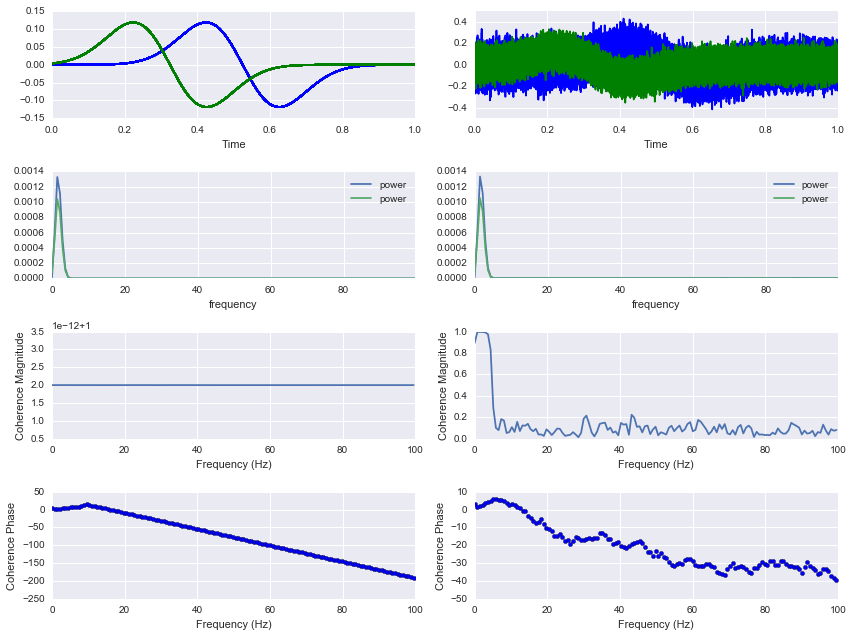

In [47]:
sampling_frequency = 1500
time_extent = (0, 1)
num_trials = 100
number_of_tapers = None
time_halfbandwidth_product = 1
desired_frequencies = [0, 100]
pad = 0

num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points)

signal1 = (scipy.stats.norm.pdf(time, .50, .1) - scipy.stats.norm.pdf(time, .55, .1)) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), num_trials))
signal2 = (scipy.stats.norm.pdf(time, .30, .1) - scipy.stats.norm.pdf(time, .35, .1)) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), num_trials))

noise1 = np.random.normal(0, .08, size=(len(time), num_trials))
noise2 = np.random.normal(0, .06, size=(len(time), num_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

fig, axis_handles = plt.subplots(4, 2, figsize=(12, 9))
axis_handles[0, 0].plot(time, signal1, color='blue');
axis_handles[0, 0].plot(time, signal2, color='green');
axis_handles[0, 0].set_xlabel('Time')

axis_handles[0, 1].plot(time, data1, color='blue');
axis_handles[0, 1].plot(time, data2, color='green');
axis_handles[0, 1].set_xlabel('Time')

spectral.multitaper_power_spectral_density(signal1, sampling_frequency,
                                                        number_of_tapers=number_of_tapers,
                                                        time_halfbandwidth_product=time_halfbandwidth_product,
                                                        desired_frequencies=desired_frequencies).plot(ax=axis_handles[1, 0])

spectral.multitaper_power_spectral_density(signal2, sampling_frequency,
                                                        number_of_tapers=number_of_tapers,
                                                        time_halfbandwidth_product=time_halfbandwidth_product,
                                                        desired_frequencies=desired_frequencies).plot(ax=axis_handles[1, 0])


spectral.multitaper_power_spectral_density(data1, sampling_frequency,
                                                        number_of_tapers=number_of_tapers,
                                                        time_halfbandwidth_product=time_halfbandwidth_product,
                                                        desired_frequencies=desired_frequencies).plot(ax=axis_handles[1, 1])

spectral.multitaper_power_spectral_density(data2, sampling_frequency,
                                                        number_of_tapers=number_of_tapers,
                                                        time_halfbandwidth_product=time_halfbandwidth_product,
                                                        desired_frequencies=desired_frequencies).plot(ax=axis_handles[1, 1])

coh_signal = spectral.multitaper_coherence([signal1, signal2],
                                           time_halfbandwidth_product=time_halfbandwidth_product,
                                           desired_frequencies=desired_frequencies,
                                           sampling_frequency=sampling_frequency)

axis_handles[2, 0].plot(coh_signal.index, coh_signal.coherence_magnitude)
axis_handles[2, 0].set_xlabel('Frequency (Hz)')
axis_handles[2, 0].set_ylabel('Coherence Magnitude')
axis_handles[3, 0].set_xlim(desired_frequencies)

axis_handles[3, 0].scatter(coh_signal.index, np.unwrap(coh_signal.coherence_phase),  marker='8')
axis_handles[3, 0].set_xlabel('Frequency (Hz)')
axis_handles[3, 0].set_ylabel('Coherence Phase')
axis_handles[3, 0].set_xlim(desired_frequencies)

coh_data = spectral.multitaper_coherence([data1, data2],
                                         time_halfbandwidth_product=time_halfbandwidth_product,
                                         desired_frequencies=desired_frequencies,
                                         sampling_frequency=sampling_frequency)
axis_handles[2, 1].plot(coh_data.index, coh_data.coherence_magnitude)
axis_handles[2, 1].set_xlabel('Frequency (Hz)')
axis_handles[2, 1].set_ylabel('Coherence Magnitude')
axis_handles[2, 1].set_xlim(desired_frequencies)

axis_handles[3, 1].scatter(coh_data.index, np.unwrap(coh_data.coherence_phase),  marker='8')
axis_handles[3, 1].set_xlabel('Frequency (Hz)')
axis_handles[3, 1].set_ylabel('Coherence Phase')
axis_handles[3, 1].set_xlim(desired_frequencies)

plt.tight_layout()

### Changing over time

In [ ]:
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
num_trials = 300
num_time_points = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=num_time_points, endpoint=True)
signal1 = np.sin(2 * np.pi * time * frequency_of_interest)
# Randomized phase until time > 1.5
phase_offset = np.random.uniform(-np.pi, np.pi, size=time.shape)
change_time_start_ind = np.where(time == 1.5)[0][0]
phase_offset[np.where(time > 1.5)] = np.pi / 2
signal2 = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
signal2[change_time_start_ind:change_time_start_ind+10] = 0
# signal2[0:10] = 0
noise1 = np.random.normal(0, 0.3, size=(len(signal1), num_trials))
noise2 = np.random.normal(0, 0.1, size=(len(signal1), num_trials))
data1 = signal1[:,np.newaxis] + noise1
data2 = signal2[:,np.newaxis] + noise2

time_halfbandwidth_product = 2
desired_frequencies=[0, 300]
pad=0

plt.figure(figsize=(15, 6))
plt.subplot(3, 2, 1)
plt.plot(time, signal1)
plt.plot(time, signal2)
plt.xlim((0.3, 0.4))
plt.ylim((-10, 10))

ax = plt.subplot(3, 2, 2)
plt.plot(time, data1, color='blue')
plt.plot(time, data2, color='green')
plt.xlim((0.3, 0.4))
plt.ylim((-10, 10))
ax.set_xlabel('Time')

ax = plt.subplot(3, 2, 3)
coherogram = spectral.get_coherence_dataframe(signal1, signal2,
                                              time_window_duration=0.080,
                                              time_window_step=0.040,
                                              time_halfbandwidth_product=time_halfbandwidth_product,
                                              desired_frequencies=desired_frequencies,
                                              sampling_frequency=sampling_frequency,
                                              pad=pad,
                                              time=time)
spectral.plot_coherogram(coherogram, ax)

ax = plt.subplot(3, 2, 4)
coherogram = spectral.get_coherence_dataframe(data1, data2,
                                              time_window_duration=0.080,
                                              time_window_step=0.040,
                                              time_halfbandwidth_product=time_halfbandwidth_product,
                                              desired_frequencies=desired_frequencies,
                                              sampling_frequency=sampling_frequency,
                                              pad=pad,
                                              time=time)
spectral.plot_coherogram(coherogram, ax)

ax = plt.subplot(3, 2, 5)
coherogram = spectral.get_coherence_dataframe(signal1, signal2,
                                              time_window_duration=0.080,
                                              time_window_step=0.040,
                                              time_halfbandwidth_product=time_halfbandwidth_product,
                                              desired_frequencies=[150, 250],
                                              sampling_frequency=sampling_frequency,
                                              pad=pad,
                                              time=time)
spectral.get_group_delay(coherogram).plot(ax=ax)

ax = plt.subplot(3, 2, 6)
coherogram = spectral.get_coherence_dataframe(data1, data2,
                                              time_window_duration=0.080,
                                              time_window_step=0.040,
                                              time_halfbandwidth_product=time_halfbandwidth_product,
                                              desired_frequencies=[150, 250],
                                              sampling_frequency=sampling_frequency,
                                              pad=pad,
                                              time=time)
spectral.get_group_delay(coherogram).plot(ax=ax)

In [ ]:
data = coherogram.drop(['coherence_magnitude', 'power_spectrum1', 'power_spectrum2'], axis=1)
g = sns.FacetGrid(data, col='time', col_wrap=3, aspect=3)
g.map(sns.regplot, 'frequency', 'coherence_phase')